In [18]:
import json
train_coco = None
val_coco = None
test_coco = None
train_json = "/scratch1/rsawahn/data/sds/coco/annotations/instances_train.json"
val_json = "/scratch1/rsawahn/data/sds/coco/annotations/instances_val.json"
test_json = "/scratch1/rsawahn/data/sds/coco/annotations/instances_test.json"
with open(train_json, "r") as f:
    train_coco = json.load(f)

with open(val_json, "r") as f:
    val_coco = json.load(f)
    
with open(test_json, "r") as f:
    test_coco = json.load(f)
    
all_coco = [train_coco, val_coco, test_coco]
ds_names = ["train", "validate", "test"]

print(train_coco.keys(), val_coco.keys(), test_coco.keys())
print(train_coco["categories"], val_coco["categories"], test_coco["categories"])

# print all keys used in annotations as a set
all_keys = set()
for ds in all_coco:
    for ann in ds["images"]:
        all_keys.update(ann.keys())
print(all_keys)

all_img_ids = []
for ds in all_coco:
    all_img_ids.extend([img["id"] for img in ds["images"]])

print(len(all_img_ids), len(set(all_img_ids)))
all_coco_sds = all_coco

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations']) dict_keys(['info', 'licenses', 'categories', 'images', 'annotations']) dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])
[{'supercategory': 'ignored', 'id': 0, 'name': 'ignored'}, {'supercategory': 'person', 'id': 1, 'name': 'swimmer'}, {'supercategory': 'boat', 'id': 2, 'name': 'boat'}, {'supercategory': 'boat', 'id': 3, 'name': 'jetski'}, {'supercategory': 'object', 'id': 4, 'name': 'life_saving_appliances'}, {'supercategory': 'object', 'id': 5, 'name': 'buoy'}] [{'supercategory': 'ignored', 'id': 0, 'name': 'ignored'}, {'supercategory': 'person', 'id': 1, 'name': 'swimmer'}, {'supercategory': 'boat', 'id': 2, 'name': 'boat'}, {'supercategory': 'boat', 'id': 3, 'name': 'jetski'}, {'supercategory': 'object', 'id': 4, 'name': 'life_saving_appliances'}, {'supercategory': 'object', 'id': 5, 'name': 'buoy'}] [{'supercategory': 'ignored', 'id': 0, 'name': 'ignored'}, {'supercategory': 'person', 'id'

In [19]:
import json
train_coco = None
val_coco = None
test_coco = None
train_json = "/scratch1/rsawahn/data/sw/coco/annotations/instances_train.json"
val_json = "/scratch1/rsawahn/data/sw/coco/annotations/instances_val.json"
test_json = "/scratch1/rsawahn/data/sw/coco/annotations/instances_test.json"
with open(train_json, "r") as f:
    train_coco = json.load(f)

with open(val_json, "r") as f:
    val_coco = json.load(f)
    
with open(test_json, "r") as f:
    test_coco = json.load(f)
    
all_coco = [train_coco, val_coco, test_coco]
ds_names = ["train", "validate", "test"]

print(train_coco.keys(), val_coco.keys(), test_coco.keys())
print(train_coco["categories"], val_coco["categories"], test_coco["categories"])

# print all keys used in annotations as a set
all_keys = set()
for ds in all_coco:
    for img in ds["images"]:
        all_keys.update(img.keys())
print(all_keys)

all_img_ids = []
for ds in all_coco:
    all_img_ids.extend([img["id"] for img in ds["images"]])

print(len(all_img_ids), len(set(all_img_ids)))
all_coco_sw = all_coco

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories']) dict_keys(['info', 'licenses', 'images', 'annotations', 'categories']) dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
[{'id': 0, 'name': 'boat', 'supercategory': None}] [{'id': 0, 'name': 'boat', 'supercategory': None}] [{'id': 0, 'name': 'boat', 'supercategory': None}]
{'beaufort', 'width', 'coco_url', 'height', 'license', 'focal_length', 'file_name', 'altitude', 'id', 'camera_model'}
6872 6872


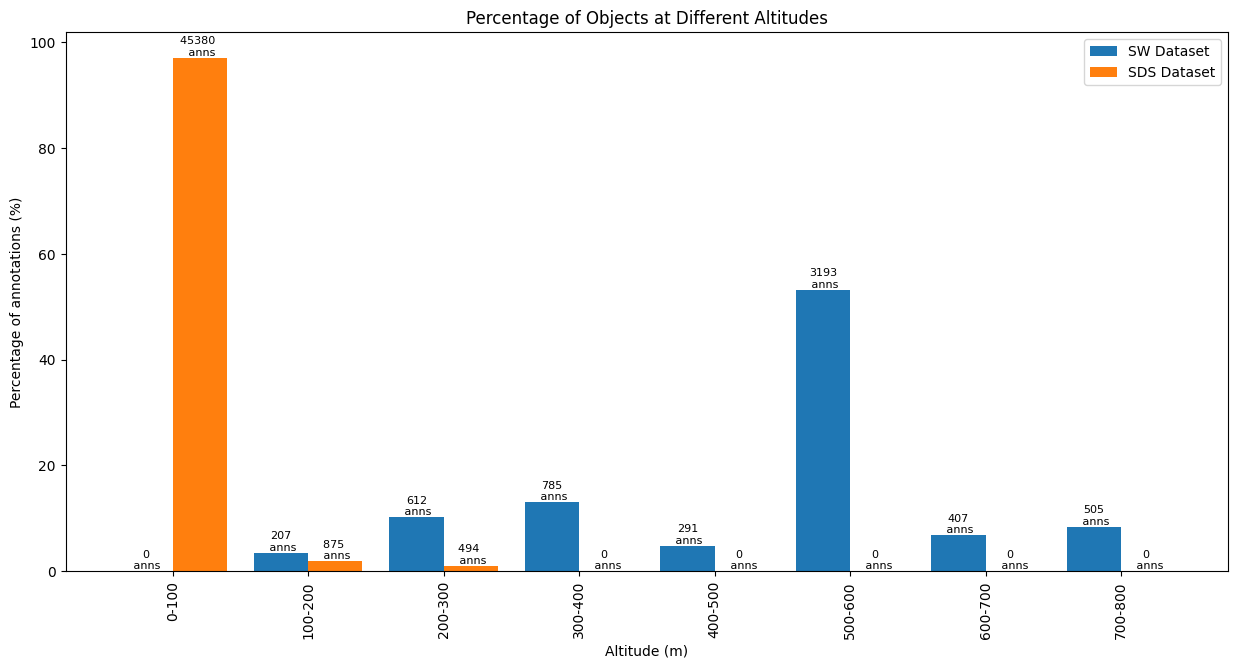

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# First dataset processing
altitude_counts_sw = {}
total_annotations_sw = 0
for coco in all_coco_sw:
    img_alt = {img["id"]: img["altitude"] for img in coco["images"]}
    for ann in coco["annotations"]:
        altitude = img_alt[ann["image_id"]]
        altitude_bin = altitude // 100
        if altitude_bin not in altitude_counts_sw:
            altitude_counts_sw[altitude_bin] = 0
        altitude_counts_sw[altitude_bin] += 1
        total_annotations_sw += 1

altitude_counts_sw = dict(sorted(altitude_counts_sw.items()))

# Second dataset processing
altitude_counts_sds = {}
total_annotations_sds = 0
altitude_keys = ["altitude", "height_above_takeoff(meter)"]
for coco in all_coco_sds:
    filtered_images = [img for img in coco["images"] if "meta" in img and img["meta"] is not None]
    img_alt = {img["id"]: (img["meta"][altitude_keys[0]] if altitude_keys[0] in img["meta"] else img["meta"][altitude_keys[1]]) for img in filtered_images }

    for ann in coco["annotations"]:
        if ann["image_id"] not in img_alt:
            continue
        altitude = img_alt[ann["image_id"]]
        altitude_bin = altitude // 100
        if altitude_bin not in altitude_counts_sds:
            altitude_counts_sds[altitude_bin] = 0
        altitude_counts_sds[altitude_bin] += 1
        total_annotations_sds += 1

altitude_counts_sds = dict(sorted(altitude_counts_sds.items()))

# Ensuring both datasets have the same bins
all_bins = sorted(set(altitude_counts_sw.keys()).union(set(altitude_counts_sds.keys())))
counts_sw = [altitude_counts_sw.get(bin, 0) for bin in all_bins]
counts_sds = [altitude_counts_sds.get(bin, 0) for bin in all_bins]

# Converting counts to percentages
percent_counts_sw = [(count / total_annotations_sw) * 100 for count in counts_sw]
percent_counts_sds = [(count / total_annotations_sds) * 100 for count in counts_sds]

# Preparing bin labels
bins_labels = [f"{int(bin)*100}-{int(bin+1)*100}" for bin in all_bins]

# Plotting the results
x = np.arange(len(all_bins))
bar_width = 0.4

plt.figure(figsize=(15, 7))
plt.xlabel("Altitude (m)")
plt.ylabel("Percentage of annotations (%)")

bars_sw = plt.bar(x - bar_width / 2, percent_counts_sw, bar_width, label='SW Dataset')
bars_sds = plt.bar(x + bar_width / 2, percent_counts_sds, bar_width, label='SDS Dataset')

# Adding exact counts on the bars
for bar, count in zip(bars_sw, counts_sw):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count) + "\n anns", ha='center', va='bottom', fontsize=8)
for bar, count in zip(bars_sds, counts_sds):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count) + " \n anns", ha='center', va='bottom', fontsize=8)

plt.xticks(ticks=x, labels=bins_labels, rotation=90)
plt.legend()
plt.title("Percentage of Objects at Different Altitudes")
plt.show()


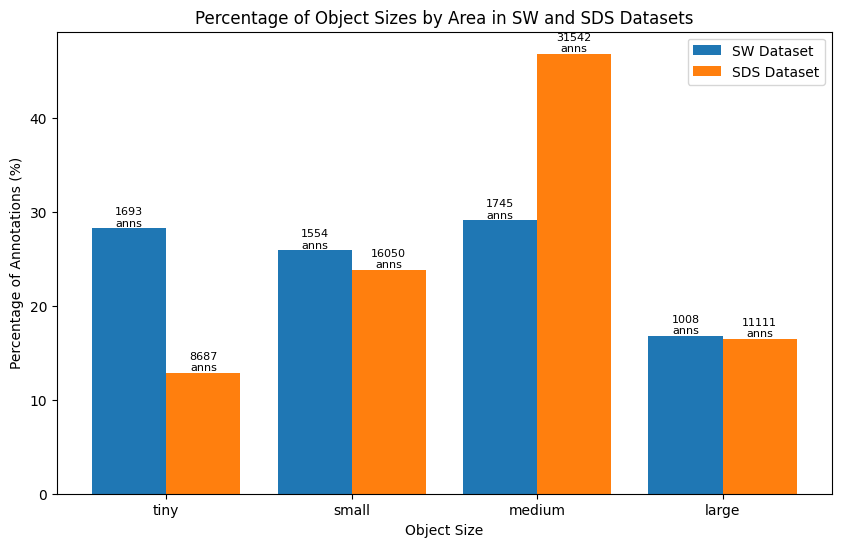

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def get_size_name(area):
    if area < 20*20:
        return "tiny"
    if area < 32*32:
        return "small"
    if area < 96*96:
        return "medium"
    else:
        return "large"
    
def compute_area(bbox):
    return bbox[2] * bbox[3]

# First dataset processing
size_counts_sw = {}
total_annotations_sw = 0
for coco in all_coco_sw:
    for ann in coco["annotations"]:
        size_name = get_size_name(compute_area(ann["bbox"]))
        if size_name not in size_counts_sw:
            size_counts_sw[size_name] = 0
        size_counts_sw[size_name] += 1
        total_annotations_sw += 1

# Sort and reverse the size counts for SW
size_counts_sw = dict(sorted(size_counts_sw.items()))
size_counts_sw = dict(reversed(list(size_counts_sw.items())))

# Second dataset processing
size_counts_sds = {}
total_annotations_sds = 0
for coco in all_coco_sds:
    for ann in coco["annotations"]:
        size_name = get_size_name(compute_area(ann["bbox"]))
        if size_name not in size_counts_sds:
            size_counts_sds[size_name] = 0
        size_counts_sds[size_name] += 1
        total_annotations_sds += 1

# Sort and reverse the size counts for SDS
size_counts_sds = dict(sorted(size_counts_sds.items()))
size_counts_sds = dict(reversed(list(size_counts_sds.items())))

# Ensuring both datasets have the same keys
all_keys = sorted(set(size_counts_sw.keys()).union(set(size_counts_sds.keys())))
all_keys.reverse()
counts_sw = [size_counts_sw.get(key, 0) for key in all_keys]
counts_sds = [size_counts_sds.get(key, 0) for key in all_keys]

# Convert counts to percentages
percent_counts_sw = [(count / total_annotations_sw) * 100 for count in counts_sw]
percent_counts_sds = [(count / total_annotations_sds) * 100 for count in counts_sds]

# Plotting the combined results
x = np.arange(len(all_keys))
bar_width = 0.4

plt.figure(figsize=(10, 6))
plt.xlabel("Object Size")
plt.ylabel("Percentage of Annotations (%)")

bars_sw = plt.bar(x - bar_width / 2, percent_counts_sw, bar_width, label='SW Dataset')
bars_sds = plt.bar(x + bar_width / 2, percent_counts_sds, bar_width, label='SDS Dataset')

# Adding exact counts on the bars
for bar, count in zip(bars_sw, counts_sw):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count}\nanns', ha='center', va='bottom', fontsize=8)
for bar, count in zip(bars_sds, counts_sds):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count}\nanns', ha='center', va='bottom', fontsize=8)

plt.xticks(ticks=x, labels=all_keys, rotation=0)
plt.legend()
plt.title("Percentage of Object Sizes by Area in SW and SDS Datasets")
plt.show()